<a href="https://colab.research.google.com/github/bilalProgTech/online-data-science-ml-challenges/blob/master/HackerEarth-Car-Insurance-ML-Challenge/Tensorflow-Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://he-s3.s3.ap-southeast-1.amazonaws.com/media/hackathon/hackerearth-machine-learning-challenge-vehicle-insurance-claim/predict-the-condition-and-insurance-amount-21-fb647347/a8725fd0b96811eb.zip
!unzip \*.zip && rm *.zip

--2021-05-26 21:03:35--  https://he-s3.s3.ap-southeast-1.amazonaws.com/media/hackathon/hackerearth-machine-learning-challenge-vehicle-insurance-claim/predict-the-condition-and-insurance-amount-21-fb647347/a8725fd0b96811eb.zip
Resolving he-s3.s3.ap-southeast-1.amazonaws.com (he-s3.s3.ap-southeast-1.amazonaws.com)... 52.219.40.67
Connecting to he-s3.s3.ap-southeast-1.amazonaws.com (he-s3.s3.ap-southeast-1.amazonaws.com)|52.219.40.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108563892 (104M) [application/zip]
Saving to: ‘a8725fd0b96811eb.zip’

a8725fd0b96811eb.zi 100%[===================>] 103.53M  18.1MB/s    in 6.7s    

2021-05-26 21:03:42 (15.5 MB/s) - ‘a8725fd0b96811eb.zip’ saved [108563892/108563892]

Archive:  a8725fd0b96811eb.zip
   creating: dataset/
   creating: dataset/trainImages/
  inflating: dataset/trainImages/img_4511041.jpg  
  inflating: dataset/trainImages/img_4638016.jpg  
  inflating: dataset/trainImages/img_4531877.jpg  
  inflating: d

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train = pd.read_csv('/content/dataset/train.csv')
test = pd.read_csv('/content/dataset/test.csv')
train.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,img_7764995.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,img_451308.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,img_7768372.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,img_7765274.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0


In [ ]:
train.shape, test.shape

((1399, 8), (600, 6))

In [ ]:
train['Condition'] = train['Condition'].astype('str')
classes = train.Condition.unique().tolist()
classes

['0', '1']

In [ ]:
import shutil
import random
import os

train_directory = '/content/dataset/training'
val_directory = '/content/dataset/validation'

if not os.path.exists(train_directory):
    os.mkdir(train_directory)
if not os.path.exists(val_directory):
    os.mkdir(val_directory)

train_file_dir = '/content/dataset/trainImages'

files_toshow = []
labels_toshow = []

for class_ in classes:
    path_train = os.path.join(train_directory, class_)
    path_val = os.path.join(val_directory, class_)
    
    print(path_val)
    
    if os.path.isdir(path_train) | os.path.isdir(path_val):
        print('Already exists')
        filenames = train.groupby('Condition')['Image_path'].get_group(class_).tolist()
        labels_toshow.append([class_] * 5)
        files_toshow.append([(train_file_dir + os.sep + file) 
                             for file in random.sample(filenames, 5)])
        
    else:
        os.mkdir(path_train)
        os.mkdir(path_val)
        
        print('Directory Created ', path_train)
        print('Directory Created ', path_val)
        
        filenames = train.groupby('Condition')['Image_path'].get_group(class_).tolist()
        
        val_files = random.sample(filenames, 50)
        train_files = [file for file in filenames if file not in val_files]
        
        files_toshow.append([(train_file_dir + os.sep + file) 
                             for file in random.sample(filenames, 5)])
        labels_toshow.append([class_] * 5)
        
        source = [(train_file_dir + os.sep + file) for file in train_files]
        for f in source:
            shutil.copy(f, path_train)
        print('Class ', class_, ' Images Moved in Training Folder')
        print(class_,' having ', len(train_files), ' files in Training Folder')
        
        source = [(train_file_dir + os.sep + file) for file in val_files]
        for f in source:
            shutil.copy(f, path_val)
        print('Class ', class_, ' Images Moved in Validation Folder')
        print(class_,' having ', len(val_files), ' files in Validation Folder')

/content/dataset/validation/0
Directory Created  /content/dataset/training/0
Directory Created  /content/dataset/validation/0
Class  0  Images Moved in Training Folder
0  having  49  files in Training Folder
Class  0  Images Moved in Validation Folder
0  having  50  files in Validation Folder
/content/dataset/validation/1
Directory Created  /content/dataset/training/1
Directory Created  /content/dataset/validation/1
Class  1  Images Moved in Training Folder
1  having  1250  files in Training Folder
Class  1  Images Moved in Validation Folder
1  having  50  files in Validation Folder


In [ ]:
from matplotlib.cbook import flatten
files = list(flatten(files_toshow))
labels_train = list(flatten(labels_toshow))

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 5
pic_index = 0

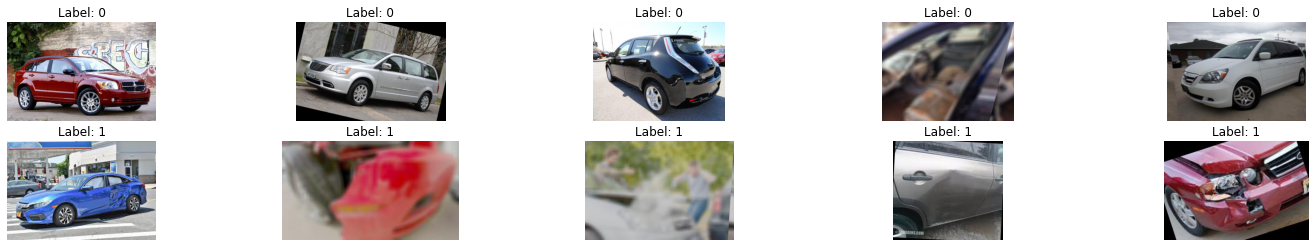

In [ ]:
fig = plt.gcf()
#plt.figure(figsize=(28,28))
fig.set_size_inches(ncols * 5, nrows * 2)

for i, img_path in enumerate(files):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.title("Label: "+labels_train[i])
    plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.keras.backend.clear_session()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    val_directory,
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary')

Found 1299 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 8)       584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 8)         584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0

In [ ]:
from tensorflow.keras.optimizers import RMSprop, SGD, Adamax

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print(logs.get('val_acc'))
        if(logs.get('val_acc')>=0.98):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True
        return
            
callbacks = myCallback()

history = model.fit(
    train_generator,
    epochs=15,
    verbose=1,
    validation_data = validation_generator)

Epoch 1/15
163/163 [==============================] - 42s 249ms/step - loss: 0.1958 - accuracy: 0.9561 - val_loss: 1.4934 - val_accuracy: 0.5000
Epoch 2/15
163/163 [==============================] - 40s 245ms/step - loss: 0.1665 - accuracy: 0.9623 - val_loss: 1.0743 - val_accuracy: 0.5000
Epoch 3/15
163/163 [==============================] - 40s 244ms/step - loss: 0.1612 - accuracy: 0.9623 - val_loss: 1.6478 - val_accuracy: 0.5000
Epoch 4/15
163/163 [==============================] - 41s 253ms/step - loss: 0.1421 - accuracy: 0.9623 - val_loss: 1.6102 - val_accuracy: 0.5000
Epoch 5/15
163/163 [==============================] - 41s 249ms/step - loss: 0.1245 - accuracy: 0.9623 - val_loss: 2.0203 - val_accuracy: 0.5000
Epoch 6/15
163/163 [==============================] - 40s 245ms/step - loss: 0.0976 - accuracy: 0.9623 - val_loss: 1.4552 - val_accuracy: 0.5000
Epoch 7/15
163/163 [==============================] - 40s 246ms/step - loss: 0.0892 - accuracy: 0.9623 - val_loss: 1.8614 - val_ac

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()